In [86]:
# Add magic commad:
%matplotlib inline
#import:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [87]:
#load csv file:
city_data_to_load ="Resources/city_data.csv"
ride_data_to_load ="Resources/ride_data.csv"


In [88]:
# read file in data frame:
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)


In [89]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [90]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [91]:
#get data from column and rows:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [92]:
#for missing value:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [93]:
#Get data type:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [94]:
#find unique value for type:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [95]:
#Get a number for Urben type:
sum(city_data_df["type"]=='Urban')

66

In [96]:
#Get a number for suburben type:
sum(city_data_df["type"]=='Suburban')

36

In [97]:
#Get a number for Rural type:
sum(city_data_df["type"]=='Rural')

18

In [98]:
#get column and rows for ride:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [99]:
#find missing value:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [100]:
#get data type for ride:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [101]:
#merge data in single frame:
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [102]:
#Get urben city:
urban_cities_df=pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [103]:
#get rural and suburban type:
suburban_cities_df= pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df= pyber_data_df[pyber_data_df["type"]=="Rural"]

In [104]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [105]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [106]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [107]:
#Get Averange fare for all tyep:
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]


In [108]:
# Get the average number of drivers for each city:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


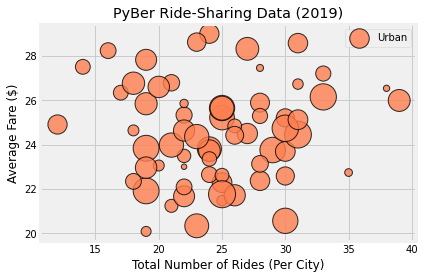

In [109]:
# Build the scatter plots for urban cities:
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

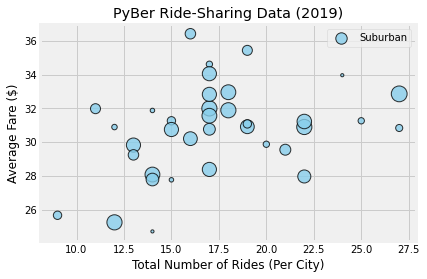

In [110]:
# Build the scatter plots for suburban cities:
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

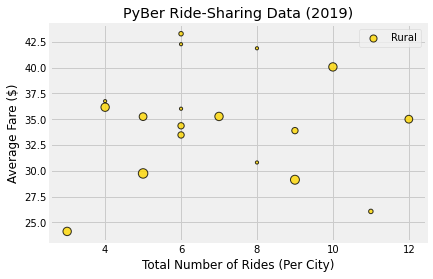

In [111]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

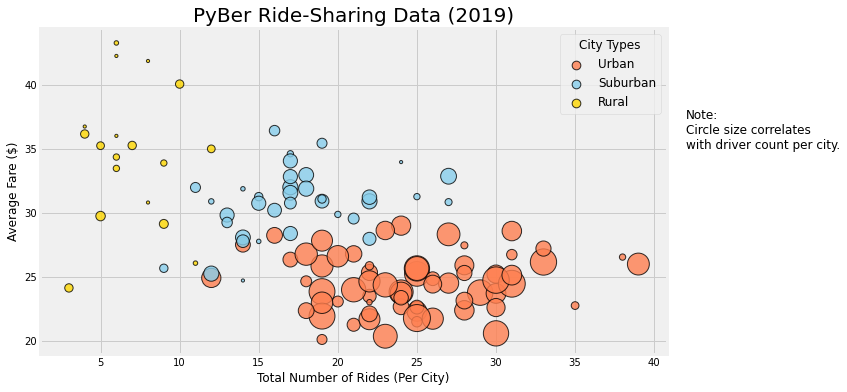

In [112]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)



# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()



In [113]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400240e+12,22.000000
50%,24.640000,4.711190e+12,37.000000
75%,34.580000,7.451580e+12,52.000000
max,44.970000,9.991540e+12,73.000000


In [114]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [115]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [116]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [117]:
# Get summary statistics.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [118]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [119]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [120]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.describe()

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [121]:
rural_fares = rural_cities_df["fare"]
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [122]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [123]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [124]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

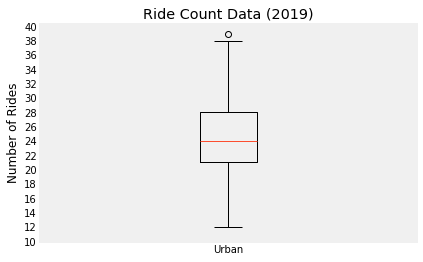

In [125]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

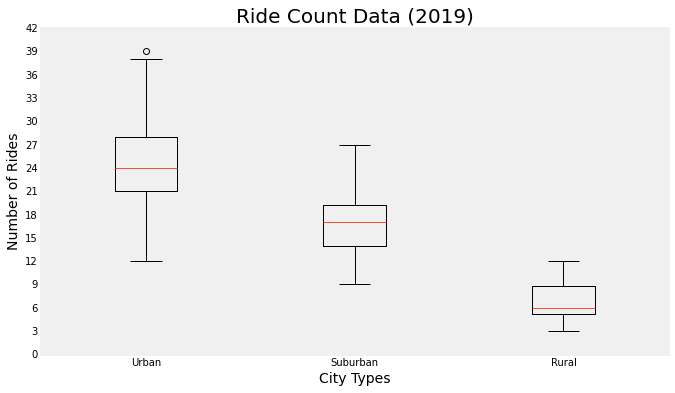

In [126]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [127]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


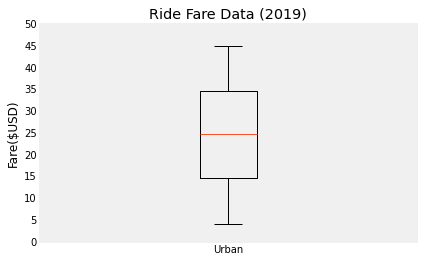

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [128]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

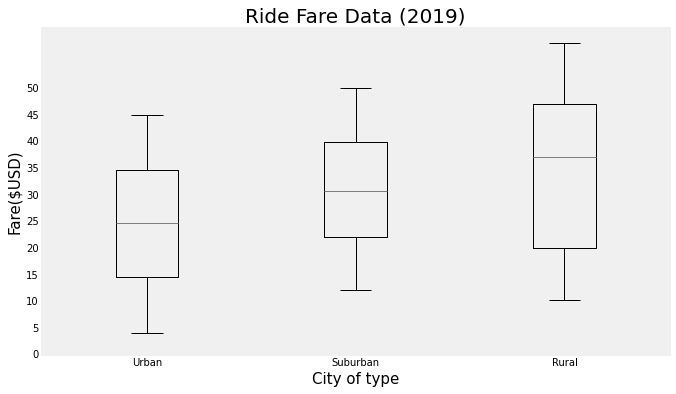

In [129]:
# Create a box-and-whisker plot for the all fare data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
all_fares=[urban_fares,suburban_fares,rural_fares]
ax.boxplot(all_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_xlabel('City of type',fontsize=15)
ax.set_ylabel('Fare($USD)',fontsize=15)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
#save fig
plt.savefig("analysis/fig3.png")
plt.show()



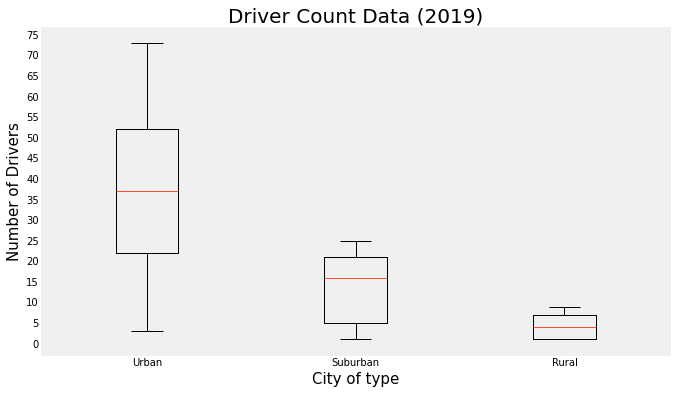

In [130]:
# Create a box-and-whisker plot for the all dirver data.
x_labels = ["Urban","Suburban","Rural"]
fig, ax = plt.subplots(figsize=(10,6))
all_drivers=[urban_drivers,suburban_drivers,rural_drivers]
ax.boxplot(all_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=15)
ax.set_xlabel('City of type',fontsize=15)

ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
#save fig
plt.savefig("analysis/fig4.png")
plt.show()


In [131]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [132]:
#get sum of total fare:
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [133]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

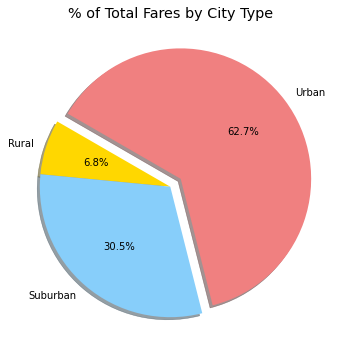

In [134]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [135]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

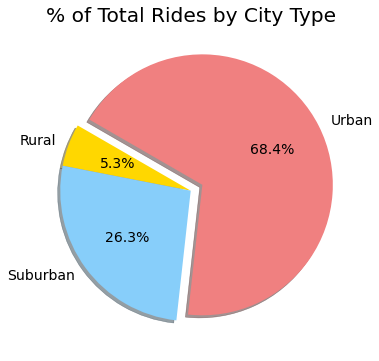

In [136]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [137]:
# Calculate the percentage of drivers for each city type.
driver_percents = city_data_df.groupby(["type"]).sum()["driver_count"]*100 /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

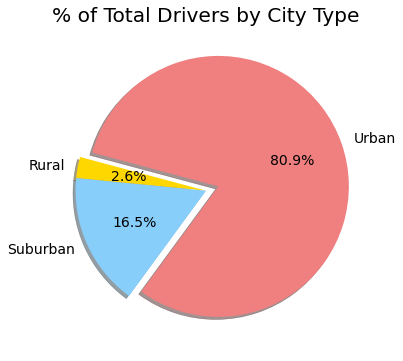

In [138]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

# Challenge: part-1

In [139]:
#find total ride:
total_ride=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [140]:
#find total drivers:
total_drivers=city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [141]:
#find total fares:
total_fares=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [142]:
#fare average per ride:
fare_avg_per_ride=total_fares/total_ride
fare_avg_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [143]:
##fare average per driver:
fare_avg_per_drivers=total_fares/total_drivers
fare_avg_per_drivers

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [144]:
final_summary_df=pd.DataFrame({
    "Total Ride":total_ride,
    "Total Driver":total_drivers,
    "Total Fare" :total_fares,
    "Average fare per ride" :fare_avg_per_ride,
    "Average fare per driver":fare_avg_per_drivers
    
})

In [145]:
final_summary_df

,Total Ride,Total Driver,Total Fare,Average fare per ride,Average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [146]:
#formatting:
final_summary_df.index.name=None
final_summary_df["Total Ride"]=final_summary_df["Total Ride"].map("{:,}".format)
final_summary_df["Total Driver"]=final_summary_df["Total Driver"].map("{:,}".format)
final_summary_df["Total Fare"]=final_summary_df["Total Fare"].map("${:,.2f}".format)
final_summary_df["Average fare per ride"]=final_summary_df["Average fare per ride"].map("${:,.2f}".format)
final_summary_df["Average fare per driver"]=final_summary_df["Average fare per driver"].map("${:,.2f}".format)


final_summary_df

,Total Ride,Total Driver,Total Fare,Average fare per ride,Average fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Challenge: part-2

In [147]:
#rename data column:
pyber_data_df.rename(columns={
    'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'
},inplace=True)

In [148]:
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [149]:
#make new data frame:
new_data_df=pyber_data_df[["Date","City Type","Fare"]].copy()
new_data_df.head()

,Date,City Type,Fare
0,1/14/2019 10:14,Urban,13.83
1,3/4/2019 18:24,Urban,30.24
2,2/24/2019 4:29,Urban,33.44
3,2/10/2019 23:22,Urban,23.44
4,3/6/2019 4:28,Urban,34.58


In [150]:
#Set the index to the datetime data type:
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])
new_data_df=new_data_df.set_index('Date')

In [151]:
new_data_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58


In [152]:
new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [153]:
#Calculate the sum() of fares by the type of city and date using groupby() to create a Series:
new_data_df=new_data_df.groupby(["City Type","Date"]).sum()
new_data_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [154]:
# create a pivot table DataFrame with the Date as the index and columns = 'City Type':
data_pivot=pd.pivot_table(new_data_df,index='Date',values='Fare',columns = 'City Type')

In [155]:
data_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [163]:
#Create a new DataFrame from the pivot table DataFrame 
data_pivot2=data_pivot.loc['2019-01-01':'2019-04-28']

In [213]:
#Create a new DataFrame by setting the DataFrame in weekly bins, and calculate the sum() :
data_pivot2_resample_df=data_pivot2.resample('w').sum()

In [214]:
data_pivot2_resample_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


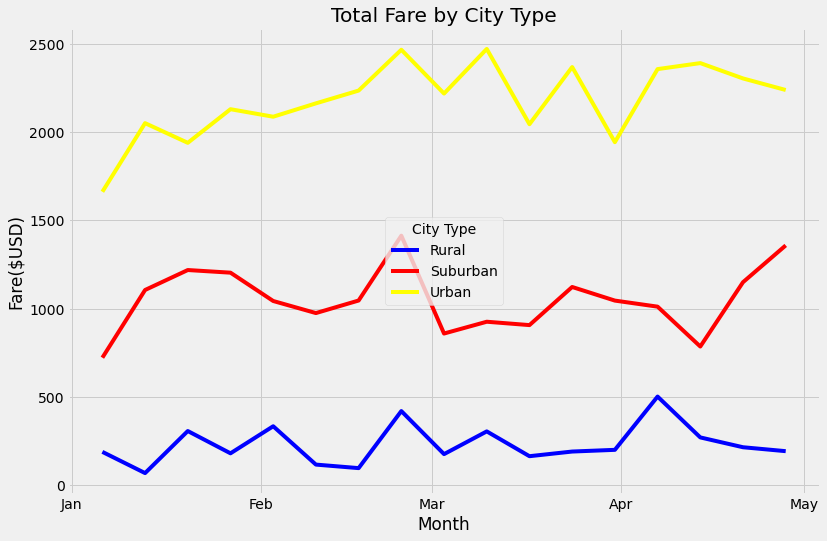

In [210]:
#Using the object-oriented interface method, plot the DataFrame:
import matplotlib.dates as mdates
fig,ax =plt.subplots(figsize=(12,8))
ax.set_title('Total Fare by City Type')
ax.set_xlabel('Month')
ax.set_ylabel('Fare($USD)')
ax.plot(data_pivot2_resample_df["Rural"],label='Rural',color='blue')
ax.plot(data_pivot2_resample_df["Suburban"],label='Suburban',color='red')
ax.plot(data_pivot2_resample_df["Urban"],label='Urban',color='yellow')
#set value in month:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.legend(title='City Type',loc='center')
ax.grid(True)
plt.savefig("analysis/TotalFarebyCityTYpe.png")
plt.style.use('fivethirtyeight')